In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('titanic_train.csv', index_col='PassengerId')

In [3]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We will be using Pclass, Sex, Age, SibSp (Siblings aboard), Parch (Parents/children aboard), and Fare to predict whether a passenger survived.

In [4]:
df = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]

We need to convert ‘Sex’ into an integer value of 0 or 1.

In [5]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

We will also drop any rows with missing values.

In [6]:
print(df.head())

             Pclass  Sex   Age  SibSp  Parch     Fare  Survived
PassengerId                                                    
1                 3    0  22.0      1      0   7.2500         0
2                 1    1  38.0      1      0  71.2833         1
3                 3    1  26.0      0      0   7.9250         1
4                 1    1  35.0      1      0  53.1000         1
5                 3    0  35.0      0      0   8.0500         0


In [7]:
df = df.dropna()

In [8]:
print(df.head())

             Pclass  Sex   Age  SibSp  Parch     Fare  Survived
PassengerId                                                    
1                 3    0  22.0      1      0   7.2500         0
2                 1    1  38.0      1      0  71.2833         1
3                 3    1  26.0      0      0   7.9250         1
4                 1    1  35.0      1      0  53.1000         1
5                 3    0  35.0      0      0   8.0500         0


In [9]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [10]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,3,0,22.0,1,0,7.2500
2,1,1,38.0,1,0,71.2833
3,3,1,26.0,0,0,7.9250
4,1,1,35.0,1,0,53.1000
5,3,0,35.0,0,0,8.0500


In [11]:
y.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [13]:
from sklearn import tree

model = tree.DecisionTreeClassifier(criterion= 'entropy')

In [14]:
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Defining some of the attributes like max_depth, max_leaf_nodes, min_impurity_split, and min_samples_leaf can help prevent overfitting the model to the training data.

First we fit our model using our training data.

In [15]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Then we score the predicted output from model on our test data against our ground truth test data.

In [16]:
y_predict = model.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.776536312849162

In [17]:
y_test

PassengerId
690    1
279    0
507    1
10     1
495    0
      ..
323    1
598    0
437    0
258    1
453    0
Name: Survived, Length: 179, dtype: int64

In [18]:
y_predict

array([1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1], dtype=int64)

We see an accuracy score of ~83.2%, which is significantly better than 50/50 guessing.

Let’s also take a look at our confusion matrix:

In [19]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Predicted Not Survival', 'Predicted Survival'],
    index=['True Not Survival', 'True Survival']
)

,Predicted Not Survival,Predicted Survival
True Not Survival,90,22
True Survival,18,49


In [20]:
#Install one library from Anaconda prompt by typing "conda install -c anaconda graphviz"

In [21]:
from sklearn.tree import export_graphviz
export_graphviz(model, out_file='tree.dot', feature_names=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'])

In [22]:
dot_data = tree.export_graphviz(model,
                                feature_names=X.columns,
                                out_file=None,
                                filled=True,
                                rounded=True)

In [26]:
#To install this package with conda run:
#conda install -c conda-forge pydotplus 

In [25]:
!dot -Tpng tree.dot > tree.png

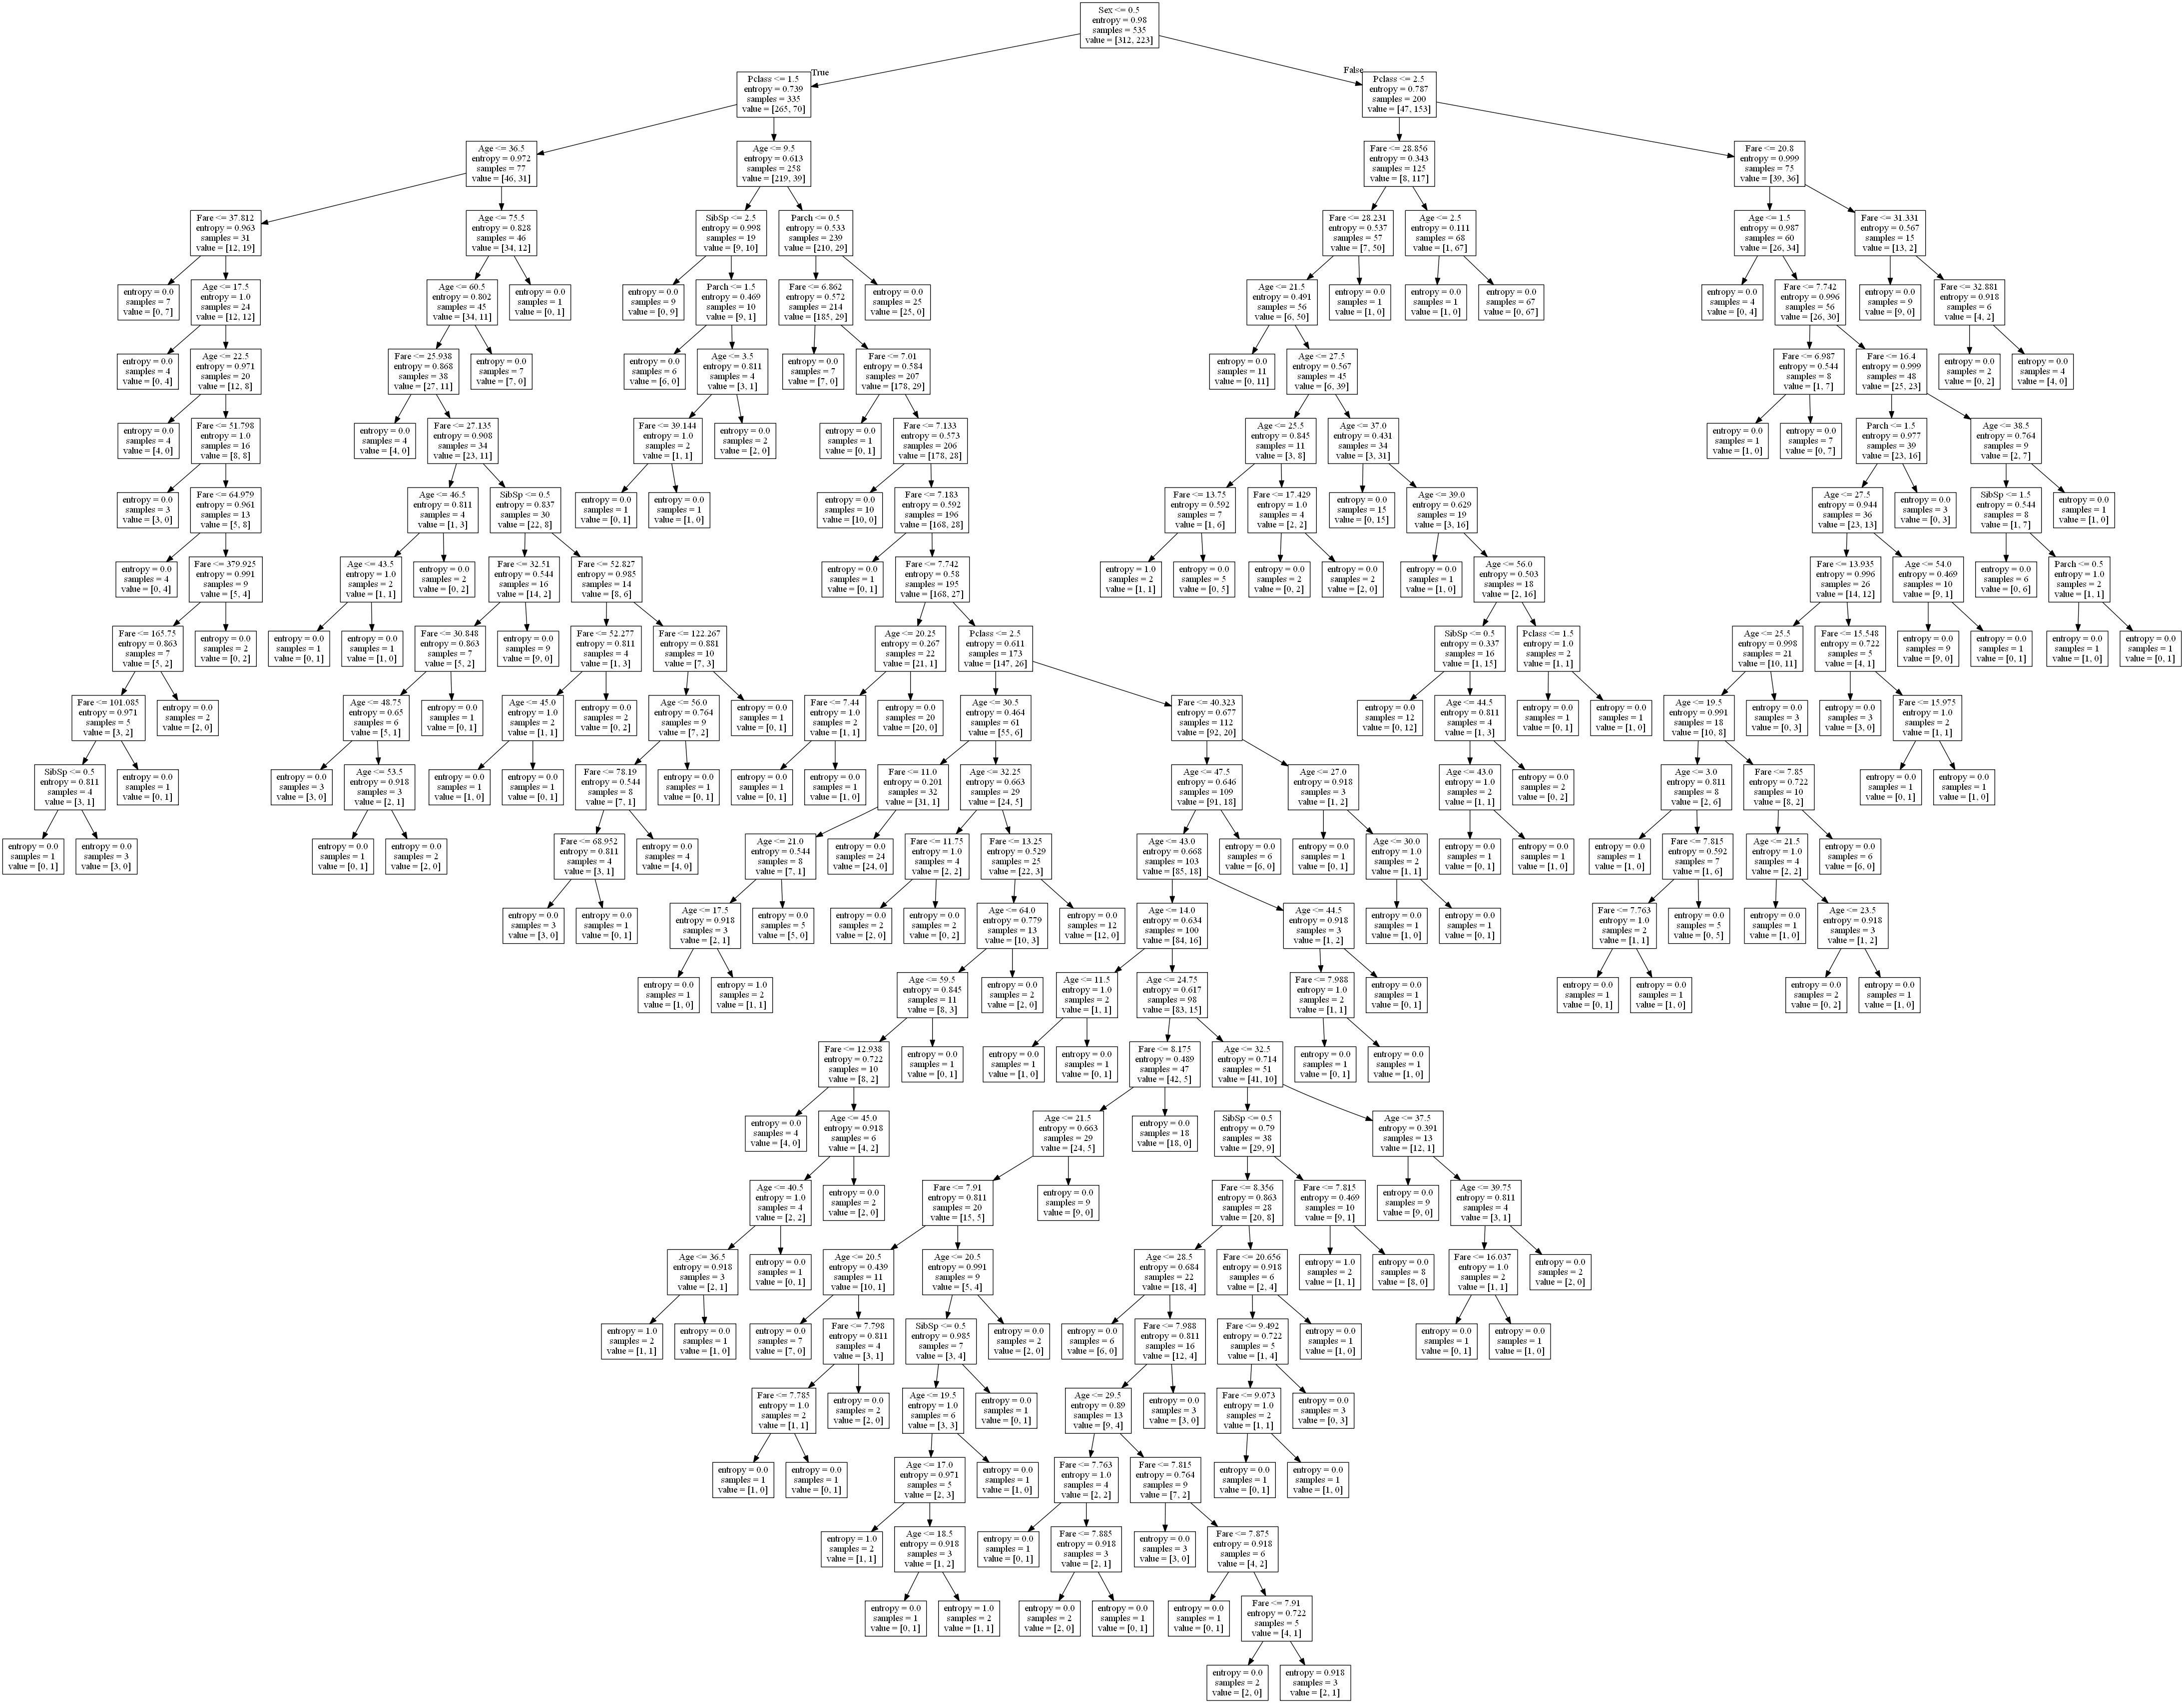

In [27]:
from IPython.display import Image
Image(filename='tree.png')